In [43]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression

from scipy.stats import spearmanr, pearsonr

from project_module import regression_report
from project_module.feature_selection import SelectKBestByCoefficient
from sklearn.feature_selection import SelectKBest, chi2

In [34]:
# load data
x_train = np.load('./x_train.npy')
y_train = np.load('./y_train.npy')
x_test = np.load('./x_test.npy')
y_test = np.load('./y_test.npy')

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(1095, 89) (1095,) (365, 89) (365,)


In [66]:
x_train=pd.DataFrame(x_train)

In [67]:
x_train.to_csv('x_train.csv', index = False)

In [35]:
def get_RF(params: dict) -> RandomForestRegressor:
    RF = RandomForestRegressor(**params)
    return RF

best_params = {
    'n_estimators': 68, 'min_samples_split': 2, 
    'min_impurity_decrease': 0.8304579924331754, 
    'max_depth': 16, 'criterion': 'mae', 
    'ccp_alpha': 2.3855551842621, 'n_jobs' : 4, 
    'warm_start': False
}

In [36]:
RF = get_RF(best_params)
RF.fit(x_train, y_train)

pred = RF.predict(x_test)
regression_report(y_test, pred)

mse = 1125365675.0065
mae = 18470.9482
rmse = 33546.4704
mape = 0.1039


## [Filter method](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest)
1. [Pearson coefficient](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html)
2. [Spearman coefficient](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html)

In [39]:
# pearson coefficient
pearson_selector = SelectKBestByCoefficient(k = 89, method = 'pearson').fit(x_train, y_train)
x_train_new = pearson_selector.transform(x_train)
x_test_new = pearson_selector.transform(x_test)

RF = get_RF(best_params)
RF.fit(x_train_new, y_train)

pred = RF.predict(x_test_new)

regression_report(y_test, pred)

mse = 1141297439.9089
mae = 18242.0196
rmse = 33783.0940
mape = 0.1033


In [48]:
b=pearson_selector.select_idx

In [57]:
mask = np.zeros(b.shape, dtype=bool)
mask=[np.argsort(b, kind="mergesort")[-89:]]
mask

[array([70, 22, 24, 21, 68, 34, 44, 58, 37,  0, 69, 35, 54, 52, 50, 16, 15,
         3, 18,  7, 32, 20, 55, 61, 36, 67, 17, 27, 31, 59,  4, 45, 41,  5,
        12, 51, 14, 46, 23, 13, 11,  6,  8, 26, 25, 30, 76, 63, 64, 65, 77,
        60, 29, 38, 42, 78, 33, 62, 83, 28, 56, 47, 84, 86, 79, 80, 82, 48,
        88, 75, 72, 73, 71, 87, 40, 57, 49, 53, 85, 81, 39, 66, 74, 43, 10,
         1,  2,  9, 19], dtype=int64)]

In [6]:
# Spearman coefficient
spearman_selector = SelectKBestByCoefficient(k = 30, method = 'spearman').fit(x_train, y_train)
x_train_new = spearman_selector.transform(x_train)
x_test_new = spearman_selector.transform(x_test)

RF = get_RF(best_params)
RF.fit(x_train_new, y_train)

pred = RF.predict(x_test_new)

regression_report(y_test, pred)

mse = 1062986453.7622
mae = 18326.8367
rmse = 32603.4730
mape = 0.1028


In [ ]:
spearman_selector.

In [109]:
# Anova for regression
anova_selector = SelectKBest(score_func = f_regression, k = 30).fit(x_train, y_train)
x_train_new = anova_selector.transform(x_train)
x_test_new = anova_selector.transform(x_test)

RF = get_RF(best_params)
RF.fit(x_train_new, y_train)

pred = RF.predict(x_test_new)

regression_report(y_test, pred)

mse = 1121538930.8331
mae = 18272.1841
rmse = 33489.3853
mape = 0.1038


In [31]:
from scipy.stats import spearmanr, pearsonr
import numpy as np

def my_pearsonr(x, y):
    row, col = x.shape
    coef_arr = np.zeros(col)
    p_val_arr = np.zeros(col)
    
    for i in range(col):
        coef_arr[i], p_val_arr[i] = pearsonr(x[:, i], y)
        
    return coef_arr, p_val_arr

def my_spearmanr(x, y):
    coef_arr, p_val_arr = spearmanr(x, y)
    coef_arr = coef_arr[: -1, -1]
    p_val_arr = p_val_arr[: -1, -1]
    
    return coef_arr, p_val_arr
    

class SelectKBestByCoefficient():
    def __init__(self, k: int, method: str = 'pearson'):
        self.k = k
        if method == 'pearson':
            self.func = my_pearsonr
        elif method == 'spearman':
            self.func = my_spearmanr
        
    def fit(self, X, Y):
        x, y = np.array(X), np.array(Y)
        
        corr, p = self.func(x, y)
        self.corr=corr
        self.p=p
        self.select_idx = np.argsort(np.abs(corr))[:: -1][: self.k]
        select_idx = np.argsort(np.abs(corr))[:: -1][: self.k]
        print(select_idx)
        return self
        
    def transform(self, X):
        x = np.array(X)
        x_new = x[:, self.select_idx]
        
        return x_new

In [32]:
# pearson coefficient
pearson_selector = SelectKBestByCoefficient(k = 30, method = 'pearson').fit(x_train, y_train)

[ 9 85 86 17 30 33 41 19 42 87 84 40 34 39 36 16 15 26 18 88 21  3  1 38
  2 44 43 27 59 52]


In [30]:
corr=pearson_selector.corr
print(corr)
print(np.argsort(np.abs(corr)))
print(np.argsort(np.abs(corr))[:: -1])

[-5.85622506e-02  3.38581100e-01  3.17094578e-01  3.73987805e-01
  6.99072838e-02  2.01707830e-01  1.26466866e-01  9.17614416e-02
  1.76342610e-01  7.87125875e-01 -6.04879352e-02  1.84059227e-01
  1.09029488e-01  1.10815899e-01  1.16352068e-01  4.40556631e-01
  4.68105676e-01  6.82015469e-01  3.97035851e-01  6.36654617e-01
  2.21611784e-01  3.83763493e-01 -1.06762339e-01  8.23051376e-02
  1.80846593e-01 -7.01656277e-02 -4.10657043e-01  2.45461249e-01
  2.26516468e-01 -8.39125919e-02  6.79693219e-01  1.25894186e-01
 -1.37861507e-01  6.73170667e-01  4.96022409e-01  1.11915715e-01
  4.72688964e-01 -1.22402050e-01 -3.35580763e-01  4.78037717e-01
  5.57488865e-01  6.39440068e-01  6.35906789e-01  2.79460256e-01
  2.81123014e-01  2.37514101e-01  2.80481877e-02 -7.83145571e-02
 -7.33651567e-02  7.15098698e-02 -2.46363223e-02 -8.30601422e-02
  2.37923646e-01 -1.59180465e-01  1.31630605e-01 -1.82001974e-02
  2.19894343e-01  7.93789942e-02  1.30415724e-02 -2.43367556e-01
 -1.06680493e-01  1.21722

In [25]:
p=pearson_selector.p
print(p)
print(np.argsort(np.abs(p)))

[5.27062056e-002 8.94625945e-031 5.32818926e-027 1.11533905e-037
 2.06965116e-002 1.62355833e-011 2.70510113e-005 2.37046495e-003
 4.23490752e-009 1.28286413e-231 4.53773457e-002 8.45160692e-010
 3.00892152e-004 2.38672442e-004 1.13899980e-004 3.33005408e-053
 1.01675394e-060 1.06965578e-150 1.16636161e-042 1.66056378e-125
 1.19487998e-013 9.62671308e-040 4.01747302e-004 6.42907128e-003
 1.66737692e-009 2.02304551e-002 8.55265262e-046 1.72782144e-016
 3.30292281e-014 5.46166509e-003 2.69046153e-149 2.94327371e-005
 4.68068194e-006 1.97293111e-145 4.54180529e-069 2.06595346e-004
 4.88434133e-062 4.88561271e-005 3.14096858e-030 1.33246168e-063
 1.96440913e-090 6.24393305e-127 3.98364602e-125 4.28409714e-021
 2.45045873e-021 1.65497338e-015 3.53792139e-001 9.52776492e-003
 1.51735304e-002 1.79501273e-002 4.15399968e-001 5.95699449e-003
 1.47599101e-015 1.18894652e-007 1.24353822e-005 5.47426604e-001
 1.86111436e-013 8.59237275e-003 6.66409266e-001 3.15831508e-016
 4.05919979e-004 5.383320

In [74]:
df = pd.read_csv('x_train.csv')
df.shape

(1095, 89)

In [76]:
importance_idx = RF.feature_importances_
importance_idx

array([2.44464510e-01, 2.81974221e-01, 6.82221630e-02, 3.12244131e-03,
       2.47918462e-02, 7.36123257e-03, 8.22050879e-03, 1.52754666e-02,
       2.84774652e-02, 1.98359211e-02, 3.90832929e-02, 3.93972665e-03,
       5.17304428e-03, 1.56655933e-02, 7.35335107e-03, 1.39267645e-02,
       2.68910405e-03, 2.64627345e-03, 1.85415589e-03, 1.56668915e-02,
       5.49750127e-03, 2.11023288e-02, 6.25185784e-03, 6.16733799e-03,
       1.43264958e-02, 9.67153969e-04, 1.28255044e-03, 3.08073447e-03,
       2.34150054e-03, 4.76027314e-03, 1.26897507e-03, 9.71033475e-04,
       1.38564071e-03, 1.61436630e-03, 1.25958608e-02, 2.63424012e-03,
       1.55414243e-02, 3.12136011e-03, 3.35215838e-04, 2.64158717e-04,
       5.33569582e-04, 1.12168217e-03, 3.58534179e-04, 8.11212230e-04,
       2.22822179e-03, 4.86714026e-03, 4.40703037e-03, 2.00426752e-03,
       1.29901335e-03, 4.04681203e-04, 4.75299213e-03, 2.38896679e-03,
       4.18869180e-03, 2.57971290e-04, 1.87435222e-03, 3.78730923e-03,
      

In [77]:
importance_idx1=np.argsort(RF.feature_importances_)
importance_idx1

array([80, 74, 79, 81, 68, 75, 57, 87, 59, 67, 58, 83, 53, 39, 63, 38, 62,
       76, 42, 88, 84, 49, 64, 85, 40, 78, 56, 66, 43, 25, 71, 31, 41, 73,
       30, 26, 48, 32, 72, 82, 33, 61, 18, 54, 60, 47, 44, 28, 51, 86, 35,
       17, 16, 27, 37,  3, 70, 55, 11, 52, 46, 50, 29, 45, 12, 20, 77, 23,
       22, 14,  5,  6, 65, 69, 34, 15, 24,  7, 36, 13, 19,  9, 21,  4,  8,
       10,  2,  0,  1], dtype=int64)

In [79]:
importance_idx = np.argsort(RF.feature_importances_)[::-1]
importance_idx

array([ 1,  0,  2, 10,  8,  4, 21,  9, 19, 13, 36,  7, 24, 15, 34, 69, 65,
        6,  5, 14, 22, 23, 77, 20, 12, 45, 29, 50, 46, 52, 11, 55, 70,  3,
       37, 27, 16, 17, 35, 86, 51, 28, 44, 47, 60, 54, 18, 61, 33, 82, 72,
       32, 48, 26, 30, 73, 41, 31, 71, 25, 43, 66, 56, 78, 40, 85, 64, 49,
       84, 88, 42, 76, 62, 38, 63, 39, 53, 83, 58, 67, 59, 87, 57, 75, 68,
       81, 79, 74, 80], dtype=int64)

In [80]:
importance_idx = np.argsort(RF.feature_importances_)[::-1]
importance_idx

array([ 1,  0,  2, 10,  8,  4, 21,  9, 19, 13, 36,  7, 24, 15, 34, 69, 65,
        6,  5, 14, 22, 23, 77, 20, 12, 45, 29, 50, 46, 52, 11, 55, 70,  3,
       37, 27, 16, 17, 35, 86, 51, 28, 44, 47, 60, 54, 18, 61, 33, 82, 72,
       32, 48, 26, 30, 73, 41, 31, 71, 25, 43, 66, 56, 78, 40, 85, 64, 49,
       84, 88, 42, 76, 62, 38, 63, 39, 53, 83, 58, 67, 59, 87, 57, 75, 68,
       81, 79, 74, 80], dtype=int64)

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
importance_idx = np.argsort(RF.feature_importances_)[::-1]
importance = RF.feature_importances_[importance_idx]
impo_label = df.columns[importance_idx]

In [85]:
importance_idx

array([ 1,  0,  2, 10,  8,  4, 21,  9, 19, 13, 36,  7, 24, 15, 34, 69, 65,
        6,  5, 14, 22, 23, 77, 20, 12, 45, 29, 50, 46, 52, 11, 55, 70,  3,
       37, 27, 16, 17, 35, 86, 51, 28, 44, 47, 60, 54, 18, 61, 33, 82, 72,
       32, 48, 26, 30, 73, 41, 31, 71, 25, 43, 66, 56, 78, 40, 85, 64, 49,
       84, 88, 42, 76, 62, 38, 63, 39, 53, 83, 58, 67, 59, 87, 57, 75, 68,
       81, 79, 74, 80], dtype=int64)

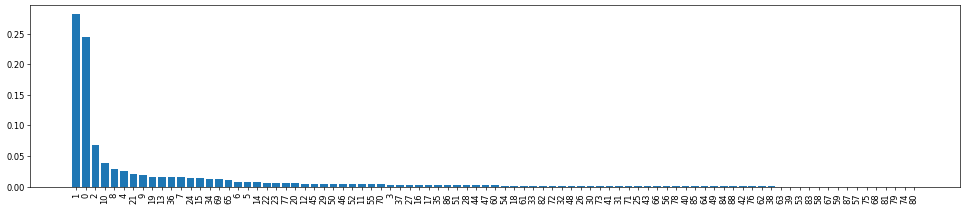

In [83]:
plt.figure(figsize = (20, 4), dpi = 60)
plt.bar(impo_label, importance)
plt.xticks(rotation='vertical')
plt.show()